In [43]:
!pip install keras

In [44]:
! pip install tensorflow

In [45]:
import keras

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [2]:
import pandas as  pd

In [3]:
df=pd.read_csv('Alphabets_data.csv')

In [4]:
# importing packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**EDA**

1. Data Exploration and **Preprocessing¶**

● Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.

● Execute necessary data preprocessing steps including data normalization, managing missing values.




In [5]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
df.shape

(20000, 17)

In [7]:
df.size

340000

In [8]:
df.ndim

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [10]:
## clearly data has no missing values which can also be seen by-
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [11]:
df.duplicated().any()

True

In [12]:
df[df.duplicated()]

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [15]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [21]:
df.drop_duplicates(inplace=True)
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [ ]:
### clearly duplicated has been removed from the data.

In [22]:
df.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
lab_enc=LabelEncoder()

In [26]:
df['letter']=lab_enc.fit_transform(df['letter'])

In [27]:
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [28]:
df['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [29]:
len(df['letter'].unique())

26

In [30]:
#Normalisation/standardisation
from sklearn.preprocessing import StandardScaler



In [31]:
std_sca=StandardScaler()

In [32]:
features=df.drop('letter',axis=1)

In [33]:
target=df[['letter']]

In [34]:
features.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [35]:
target.head()

,letter
0,19
1,8
2,3
3,13
4,6


In [36]:
scaled_data=std_sca.fit_transform(features)

In [37]:
features1=pd.DataFrame(scaled_data,columns=features.columns)

In [38]:
features1.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868


**2. Model Implementation **

● Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.

● Divide the dataset into training and test sets.

● Train your model on the training set and then use it to make predictions on the test set.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.75,random_state=100)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14001, 16)
(4667, 16)
(14001, 1)
(4667, 1)


In [46]:
y_train= keras.utils.to_categorical(y_train) #coverting single digit format to multiple digit format

In [48]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
y_test= keras.utils.to_categorical(y_test)

In [50]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model

In [52]:
len(features1.columns)

16

In [66]:
epochs=10
batch_size=1000
no_classes=26

In [58]:
model=Sequential()
model.add(Dense(36,activation='relu',input_shape=(16,)))
model.add(Dense(36,activation='relu'))
model.add(Dense(no_classes,activation='softmax'))
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 36)                  │             612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 36)                  │           1,332 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 26)                  │             962 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,906 (11.35 KB)

 Trainable params: 2,906 (11.35 KB)

 Non-trainable params: 0 (0.00 B)

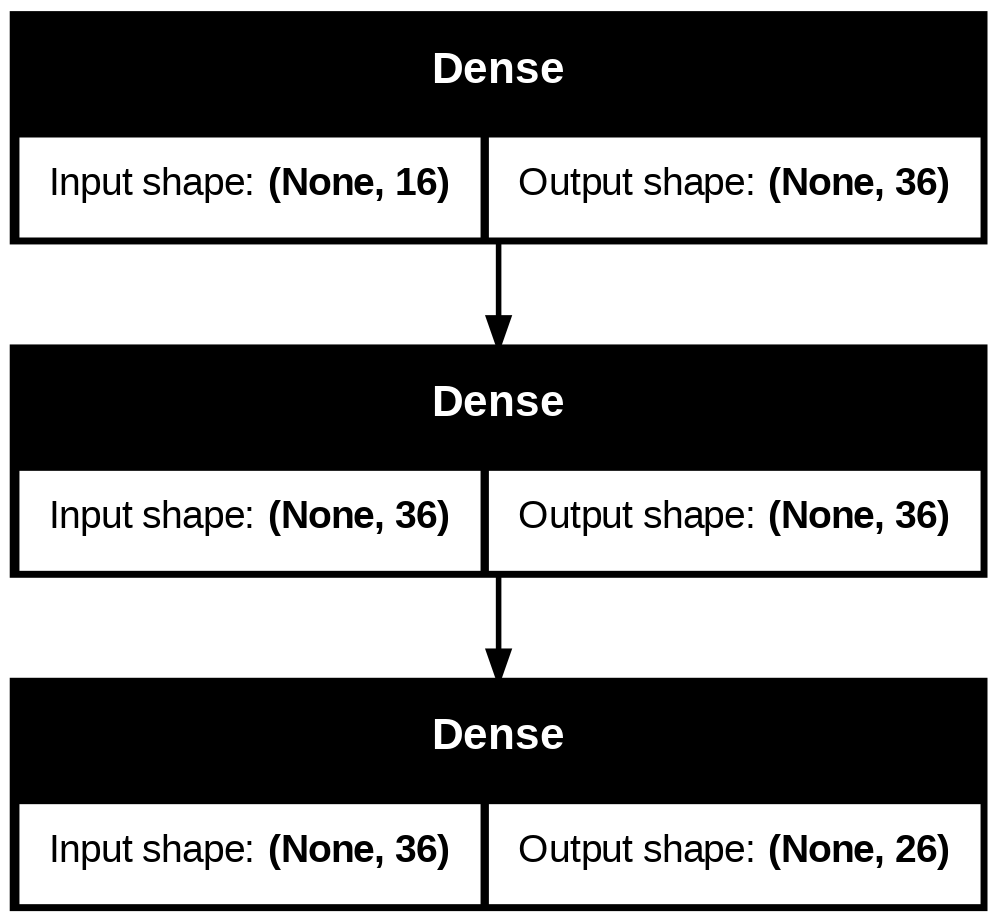

In [59]:
plot_model(model,show_shapes=True)

In [60]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=4)

In [64]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [69]:
history= model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2356 - loss: 2.8721 - val_accuracy: 0.2824 - val_loss: 2.7697
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2900 - loss: 2.7388 - val_accuracy: 0.3310 - val_loss: 2.6381
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3329 - loss: 2.6001 - val_accuracy: 0.3651 - val_loss: 2.5005
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3612 - loss: 2.4684 - val_accuracy: 0.3872 - val_loss: 2.3744
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3838 - loss: 2.3393 - val_accuracy: 0.4088 - val_loss: 2.2413
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4117 - loss: 2.2128 - val_accuracy: 0.4418 - val_loss: 2.1104
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4495 - loss: 2.0755 - val_accuracy: 0.4755 - val_loss: 1.9924
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4789 - loss: 1.9597 - val_accuracy: 0.4894 - val_loss

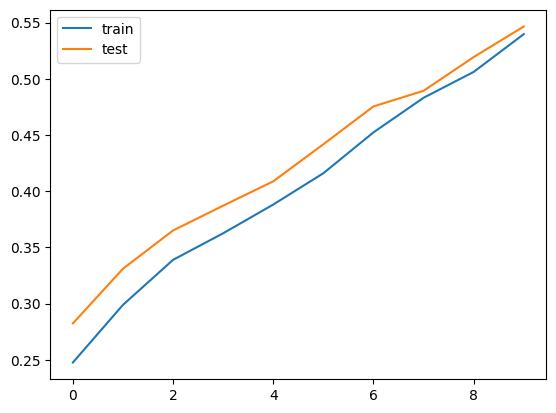

In [70]:
plt.plot(range(10),history.history['accuracy'],label='train')
plt.plot(range(10),history.history['val_accuracy'],label='test')
plt.legend()

3. **Hyperparameter Tuning**

●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.

●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.



In [73]:
from tensorflow.keras.layers import LeakyReLU

In [80]:
model=Sequential() ## Here i am using different neurons per hidden layer, activation functions
                                              # Also here we are using more hidden layers than previous one,previously it was 2 now it is 3 for  hyperparameter tunning
model.add(Dense(40,activation='tanh',input_shape=(16,)))
model.add(Dense(40,activation='tanh'))
model.add(Dense(40,activation='tanh'))
model.add(Dense(no_classes,activation='softmax'))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 40)                  │             680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 40)                  │           1,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 26)                  │           1,066 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,026 (19.63 KB)

 Trainable params: 5,026 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
from keras.optimizers import Adam

In [83]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
history= model.fit(x_train,y_train,epochs=8,batch_size=batch_size,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 1/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - accuracy: 0.0732 - loss: 3.2272 - val_accuracy: 0.1742 - val_loss: 2.9662
Epoch 2/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.2010 - loss: 2.9022 - val_accuracy: 0.2385 - val_loss: 2.7593
Epoch 3/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2578 - loss: 2.7054 - val_accuracy: 0.2901 - val_loss: 2.5994
Epoch 4/8
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3071 - loss: 2.5541 - val_accuracy: 0.3390 - val_loss: 2.4651


**4. Evaluation**

●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.

●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [93]:
y_pred = (model.predict(x_test) > 0.5).astype("int32") # it converts the no >0.5 into 1 else into 0


146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [94]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       197
           1       0.00      0.00      0.00       172
           2       0.00      0.00      0.00       190
           3       0.00      0.00      0.00       185
           4       0.00      0.00      0.00       174
           5       0.00      0.00      0.00       195
           6       0.00      0.00      0.00       158
           7       0.00      0.00      0.00       187
           8       0.00      0.00      0.00       123
           9       0.00      0.00      0.00       169
          10       0.00      0.00      0.00       185
          11       0.00      0.00      0.00       164
          12       0.00      0.00      0.00       189
          13       0.00      0.00      0.00       169
          14       0.00      0.00      0.00       203
          15       0.00      0.00      0.00       185
          16       0.00      0.00      0.00       189
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
